In [2]:
import numpy as np
import pandas as pd


<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
بخش اول:
<p></p>
<font size=4>
ابتدا داده ها را می خوانیم 
داده ها بصورت زیر می باشند

In [10]:
data = pd.read_csv('ozon.csv')
data

,radiation,temperature,wind,ozone
0,190,67,7.4,41
1,118,72,8.0,36
2,149,74,12.6,12
3,313,62,11.5,18
4,299,65,8.6,23
...,...,...,...,...
106,20,63,16.6,14
107,193,70,6.9,30
108,191,75,14.3,14
109,131,76,8.0,18



<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
<p></p>
<font size=4>
سپس داده ها را جدا میکنیم:

In [11]:
from sklearn.model_selection import train_test_split

y = data.ozone
X = data[['radiation','temperature','wind']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)


(88, 3)
(23, 3)



<div align=right>
<font face="XB Niloofar">
<font size=4>
حال یک رگرسیون آموزش می دهیم و خطای داده ها اموزش و تست به صورت زیر می شود

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train,y_train)
reg.score(X_train, y_train)

y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

mean_sq_train = mean_squared_error(y_train_pred,y_train)
mean_sq_test = mean_squared_error(y_test_pred,y_test)


print('reg.coef:',reg.coef_)
print('mean square error for train:',mean_sq_train)
print('mean square error for test:',mean_sq_test)

reg.coef: [ 0.06339674  1.6229136  -3.45349018]
mean square error for train: 481.62978844934446
mean square error for test: 245.17289877643472



<div align=right>
<font face="XB Niloofar">

<font size=4>
اکنون به داده ها با واریانس های گوناگون نویز اضافه می کنیم 
در پایین می توانید نمودار خطا آموزش و تست را مشاهده می کنید

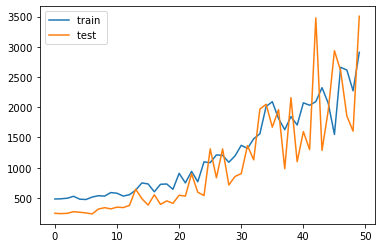

In [15]:
import matplotlib.pyplot as plt
mean_sq_train=[]
mean_sq_test = []

for sigma in range (50):
    noise1 = np.random.normal(0,sigma,y_train.shape[0])
    noise2 = np.random.normal(0,sigma,y_test.shape[0])

    y_train_new = y_train + noise1
    y_test_new = y_test + noise2

    reg = LinearRegression().fit(X_train,y_train_new)

    y_test_pred = reg.predict(X_test)
    y_train_pred = reg.predict(X_train)

    mean_sq_train.append(mean_squared_error(y_train_pred,y_train_new))
    mean_sq_test.append(mean_squared_error(y_test_pred,y_test_new))

mean_sq_train = np.array(mean_sq_train)
mean_sq_test = np.array(mean_sq_test)

sigma = np.arange(0,50)

plt.plot(sigma,mean_sq_train)
plt.plot(sigma,mean_sq_test)
plt.legend(['train ', 'test '])



<div align=right>
<font face="XB Niloofar">
<font size=4>
که با زیاد تر شدن واریانس،هر دو خطا زیادتر می شود
    <p></p>

<font size=4>
    حال توان دو را به داده ها اضافه می کنیم

In [138]:
new_X = np.append(X*X,X,axis = 1)
print(new_X.shape)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)
reg1 = LinearRegression().fit(X_train,y_train)
reg1.score(X_train, y_train)

y_test_pred = reg1.predict(X_test)
y_train_pred = reg1.predict(X_train)

mean_sq_train = mean_squared_error(y_train_pred,y_train)
mean_sq_test = mean_squared_error(y_test_pred,y_test)

print('reg.coef:',reg1.coef_)
print('mean square error for train:',mean_sq_train)
print('mean square error for test:',mean_sq_test)

(111, 6)
(111, 3)
reg.coef: [-2.51375082e-04  6.54632484e-02  6.16689081e-01  1.49401472e-01
 -8.51130784e+00 -1.72817607e+01]
mean square error for train: 301.0731846497042
mean square error for test: 479.9838582350011



<div align=right>
<font face="XB Niloofar">
<font size=4>
مشاهده می کنیم که برخلاف قسمت قبل خطای آموزش کمتر از خطای تست می باشد که نشان دهنده این می باشد که شبکه دچار اورفیت نشده اند  


<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
بخش دوم:
<p></p>
<font size=4>
ابتدا داده ها را می خوانیم 
و داده صورت افراد مختلف را به هم وصل میکنیم

In [3]:
import os
from skimage import io,color

X_train = []
X_test = []
y_train = []
y_test = []
path ='surprise videos'
counter =0
for folder in os.listdir(path):
    if counter < 18:
        dir = path +'\\'+ folder
        size = len(os.listdir(dir))
        y_sub = np.linspace(0,1,size)
        i= 0
        for file in os.listdir(dir):
            img = io.imread(dir+ "\\"+ file,as_gray=True)
            rows,cols = img.shape
            img_size = rows * cols
            img_1d = img.reshape(img_size)
            X_train.append(img_1d)
            y_train.append(y_sub[i])
            i +=1
    else:
        dir = path +'\\'+ folder
        size = len(os.listdir(dir))
        y_sub = np.linspace(0,1,size)
        i= 0
        for file in os.listdir(dir):
            img = io.imread(dir+ "\\"+ file,as_gray=True)
            rows,cols = img.shape
            img_size = rows * cols
            img_1d = img.reshape(img_size)
            X_test.append(img_1d)
            y_test.append(y_sub[i])
            i +=1
    counter +=1


<div align=right>
<font face="XB Niloofar">

<font size=4>
حال داده ها را جدا می کنیم

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

In [ ]:
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_train, y_train)

y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

mean_sq_train = mean_squared_error(y_train_pred,y_train)
mean_sq_test = mean_squared_error(y_test_pred,y_test)

In [124]:
print('reg.coef:',reg.coef_)
print('mean square error for train:',mean_sq_train)
print('mean square error for test:',mean_sq_test)

reg.coef: [ 1.58206977e-06 -9.05306954e-07  6.43236670e-07 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
mean square error for train: 3.080179286395986e-29
mean square error for test: 0.09096258091300297



<div align=right>
<font face="XB Niloofar">
<font size=4>
 مشاهده می کنیم که خطای اموزش نزدیک به صفر که نشان می دهد که اموزش امکان پذیر نمی باشد. در بعضی از سیستم ها هم این مرحله دچار کرش می شود
    <p><p>
حال ماسک رو اعمال می کنیم

In [126]:
X_train = []
X_test = []
y_train = []
y_test = []
path ='surprise videos'
counter =0
for folder in os.listdir(path):
    if counter < 18:
        dir = path +'\\'+ folder
        size = len(os.listdir(dir))
        y_sub = np.linspace(0,1,size)
        i= 0
        for file in os.listdir(dir):
            img = io.imread(dir+ "\\"+ file,as_gray=True)[150:700,380:820]
            rows,cols = img.shape
            img_size = rows * cols
            img_1d = img.reshape(img_size)
            X_train.append(img_1d)
            y_train.append(y_sub[i])
            i +=1
    else:
        dir = path +'\\'+ folder
        size = len(os.listdir(dir))
        y_sub = np.linspace(0,1,size)
        i= 0
        for file in os.listdir(dir):
            img = io.imread(dir+ "\\"+ file,as_gray=True)[150:700,380:820]
            rows,cols = img.shape
            img_size = rows * cols
            img_1d = img.reshape(img_size)
            X_test.append(img_1d)
            y_test.append(y_sub[i])
            i +=1
    counter +=1

In [127]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(453, 242000) (453,)
(180, 242000) (180,)


In [129]:
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_train, y_train)

y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

mean_sq_train = mean_squared_error(y_train_pred,y_train)
mean_sq_test = mean_squared_error(y_test_pred,y_test)
print('reg.coef:',reg.coef_)
print('mean square error for train:',mean_sq_train)
print('mean square error for test:',mean_sq_test)

reg.coef: [-7.53516559e-05 -4.23646447e-04 -4.45011256e-04 ... -8.70736054e-04
 -8.70736054e-04 -9.33742448e-04]
mean square error for train: 2.807649740572779e-29
mean square error for test: 0.11915504680722501


In [ ]:

<div align=right>
<font face="XB Niloofar">
<font size=4>
 مشاهده می کنیم که خطای اموزش نزدیک به صفر که نشان می دهد که اموزش امکان پذیر می باشد ولی احتمالا به خوبی اموزش ندیده است گرچه نسبت به حالت قبل چون داده ها کمتر شده بهتر است
    <p><p>
حال پی سی ای رو اعمال می کنیم

In [133]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(X_train)
X_train_reduce = pca.transform(X_train)
X_test_reduce = pca.transform(X_test)

reg = LinearRegression().fit(X_train_reduce,y_train)
reg.score(X_train_reduce, y_train)

y_test_pred = reg.predict(X_test_reduce)
y_train_pred = reg.predict(X_train_reduce)

mean_sq_train = mean_squared_error(y_train_pred,y_train)
mean_sq_test = mean_squared_error(y_test_pred,y_test)
print('reg.coef:',reg.coef_)
print('mean square error for train:',mean_sq_train)
print('mean square error for test:',mean_sq_test)

reg.coef: [ 8.45774699e-05  1.54132674e-03  1.35194482e-03 -3.23073809e-03
 -3.99951293e-04  1.12329401e-03 -2.04145764e-03 -9.55581427e-04
  6.63759531e-03  8.19676350e-03 -3.04864176e-03  3.27285993e-03
  3.45641278e-04 -6.26934563e-04 -1.21234623e-03  4.30191549e-03
 -5.07491305e-05 -3.39420239e-03 -1.35700808e-03  2.05786676e-03
 -7.09325761e-03 -1.04345382e-02  5.50210902e-04 -1.15140799e-02
  9.76134013e-04  4.47926238e-03 -5.66123917e-03  1.08957422e-03
 -4.10751977e-03  1.16437477e-02  7.30076074e-05 -6.16096513e-03
 -3.84551016e-03 -4.66613285e-03  5.38836392e-03 -1.10296574e-03
  1.51085947e-02 -4.22616657e-04 -3.94634681e-03 -3.18414703e-03
 -1.87811253e-03  1.51920070e-03 -1.99491615e-03 -5.42652758e-04
 -6.61217349e-04 -1.11675717e-02 -2.92749734e-04  1.24257019e-02
 -1.08792514e-02 -2.80856017e-03]
mean square error for train: 0.010838298340215213
mean square error for test: 0.07640369357917663



<div align=right>
<font face="XB Niloofar">
<font size=4>
در این حالت به یک خطای اموزش و تست منطقی و قابل قبول رسیدیم که نشان دهنده درست بودن اموزش ما با تعداد داده ها می باشد